This is a jupyter notebook. You can selectively run any cell by selecting the cell and clicking **run**  
(optional) Install Jupyter with:  
```pip install jupyter```

Install NumPy:  
    ```pip install numpy```  
Install Keras:  
    ```pip install keras```  
Install Matplotlib:  
    ```pip install matplotlib```  
Install CNTK:  
    1) Go to [The CNTK docs](https://docs.microsoft.com/en-us/cognitive-toolkit/setup-windows-python?tabs=cntkpy22)  
    2) Find the library which matches your python installation, and computer architecture  
    3) ```pip install <given url>```

Open **cmd** and run **python**.  
Type ```import keras```  
You will receive errors. This is okay, we generating *%userprofile%\\.keras\\keras.json*  
Open *%userprofile%\\.keras\\keras.json* and change the *backend* value to *cntk*  
In your python console type ```import keras```. You should not receive errors

Import keras, matplotlib, and numpy

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPool2D
from keras.utils import np_utils
from keras.datasets import mnist
import keras.backend as K
import keras
from matplotlib import pyplot as plt

Using CNTK backend
c:\users\zachl\appdata\local\programs\python\python36\lib\site-packages\keras\backend\cntk_backend.py:19: UserWarning: CNTK backend warning: GPU is not detected. CNTK's CPU version is not fully optimized,please run with GPU to get better performance.
  'CNTK backend warning: GPU is not detected. '


In [2]:
np.random.seed(42)

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Let's choose a random number in the training data and display it with imshow.  
Notice that I am graphing the X_train member to see the handwritten digit. Y_train is the corrsponding label to X_train

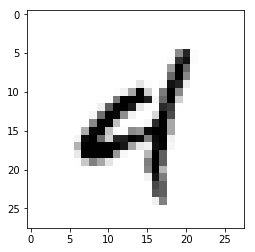

4
(60000, 28, 28)


In [4]:
toShow = np.random.randint(len(X_train))
plt.imshow(X_train[toShow], cmap='Greys')
plt.show()
print(Y_train[toShow])
print(X_train.shape)

If the X_train member is simply printed, The console will display a 28 x 28 array whose numbers are between 0 and 255.  
0 represents the whitest white and 255 represents the blackest black. Any other number is some gray in between

In [5]:
print(X_train[toShow])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 138 223   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    8 214 241   8   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  121 254 169   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

Begin Setting up the model parameters with quantities that we alrady know.  
Each image is 28x28, and there are 10 possible classes (labels): 0 .. 9  
The batch size is a hyper parameter

In [6]:
img_rows = 28
img_cols = 28
img_colors = 1
num_classes = 10
batch_size = 128

The *image_data_format* attribute in the keras.json file specifies where the number of colors is represented in the image shape.  
If *channels_first* is the value, then each image is an array of shape (img_colors, img_rows, img_cols).  
If *channels_last* is the value, then each image is an array of shape (img_rows, img_cols, img_colors)

In [7]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], img_colors, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], img_colors, img_rows, img_cols)
    img_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, img_colors)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, img_colors) 
    img_shape = (img_cols, img_rows, 1)

Ensure that our dataset is a sequence of floats, and that each number is between 0 and 1.  
We are scaling our data set to be [0,1] inclusive

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Let's print out a training sample to see what it looks like

In [9]:
print(X_train[toShow])

[[[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 

We need to convert our Y_train members from scalars to one_hot representations of those numbers.  
Ex:  
    7 becomes [0,0,0,0,0,0,0,1,0,0]  
    2 becomes [0,0,1,0,0,0,0,0,0,0]  
Keras has a convenient function to doing exactly this.    

In [10]:
Y_train = np_utils.to_categorical(Y_train, num_classes)
Y_test = np_utils.to_categorical(Y_test, num_classes)
print(Y_train[toShow])
print(Y_train.shape)


[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
(60000, 10)


Define our model

In [11]:
model = Sequential()
model.add(Convolution2D(32, kernel_size = (3,3),
        activation='relu',
        input_shape= img_shape))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Define the standards of our model

In [12]:
model.compile(loss = keras.losses.categorical_crossentropy,
                    optimizer = keras.optimizers.Adadelta(),
                    metrics = ['accuracy'])

Train the model

In [13]:
model.fit(X_train,
    Y_train,
    batch_size=batch_size,
    epochs = 1,
    verbose = 1,
    validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1


c:\users\zachl\appdata\local\programs\python\python36\lib\site-packages\cntk\core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input120") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


60000/60000 [==============================] - 608s - loss: 0.3280 - acc: 0.9003 - val_loss: 0.0804 - val_acc: 0.9755


Calculate the quality of our neural network

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)
print("loss: ", score[0])
print("accuracy: ", score[1])